In [1]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File 'bbc_text_cls.csv' already there; not retrieving.



In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import nltk
import textwrap

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF


nltk.download('stopwords')

stops = set(stopwords.words('english'))
stops = stops | {'said','would','could','told','also','one','two','mr','new','year'}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dimitris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [10]:
vectorizer = TfidfVectorizer(stop_words=list(stops))
X = vectorizer.fit_transform(df['text'])

X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
# call log-likelihood/ perplexity on test

In [11]:
nmf = NMF(
    n_components=10,
    beta_loss='kullback-leibler',
    solver = 'mu',
    random_state=0
)
nmf.fit(X_train)

NMF(beta_loss='kullback-leibler', n_components=10, random_state=0, solver='mu')

In [12]:
# barplot for each topic 
# which words have the most weights
def plot_top_words(model,feature_names,n_top_words=10):
    fig,axes = plt.subplots(2,5,figsize = (30,15),sharex=True)
    axes = axes.flatten()
    
    for topic_idx,topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words -1 :-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features,weights,height=0.7)
        ax.set_title(f"Topic {topic_idx+1}",fontdict={"fontsize":30})
        ax.invert_yaxis()
        ax.tick_params(axis="both",which="major",labelsize = 20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle('LDA',fontsize = 40)
        
    plt.subplots_adjust(top=0.90,bottom=0.05,wspace = 0.9,hspace=0.3)
    plt.show()
        
        

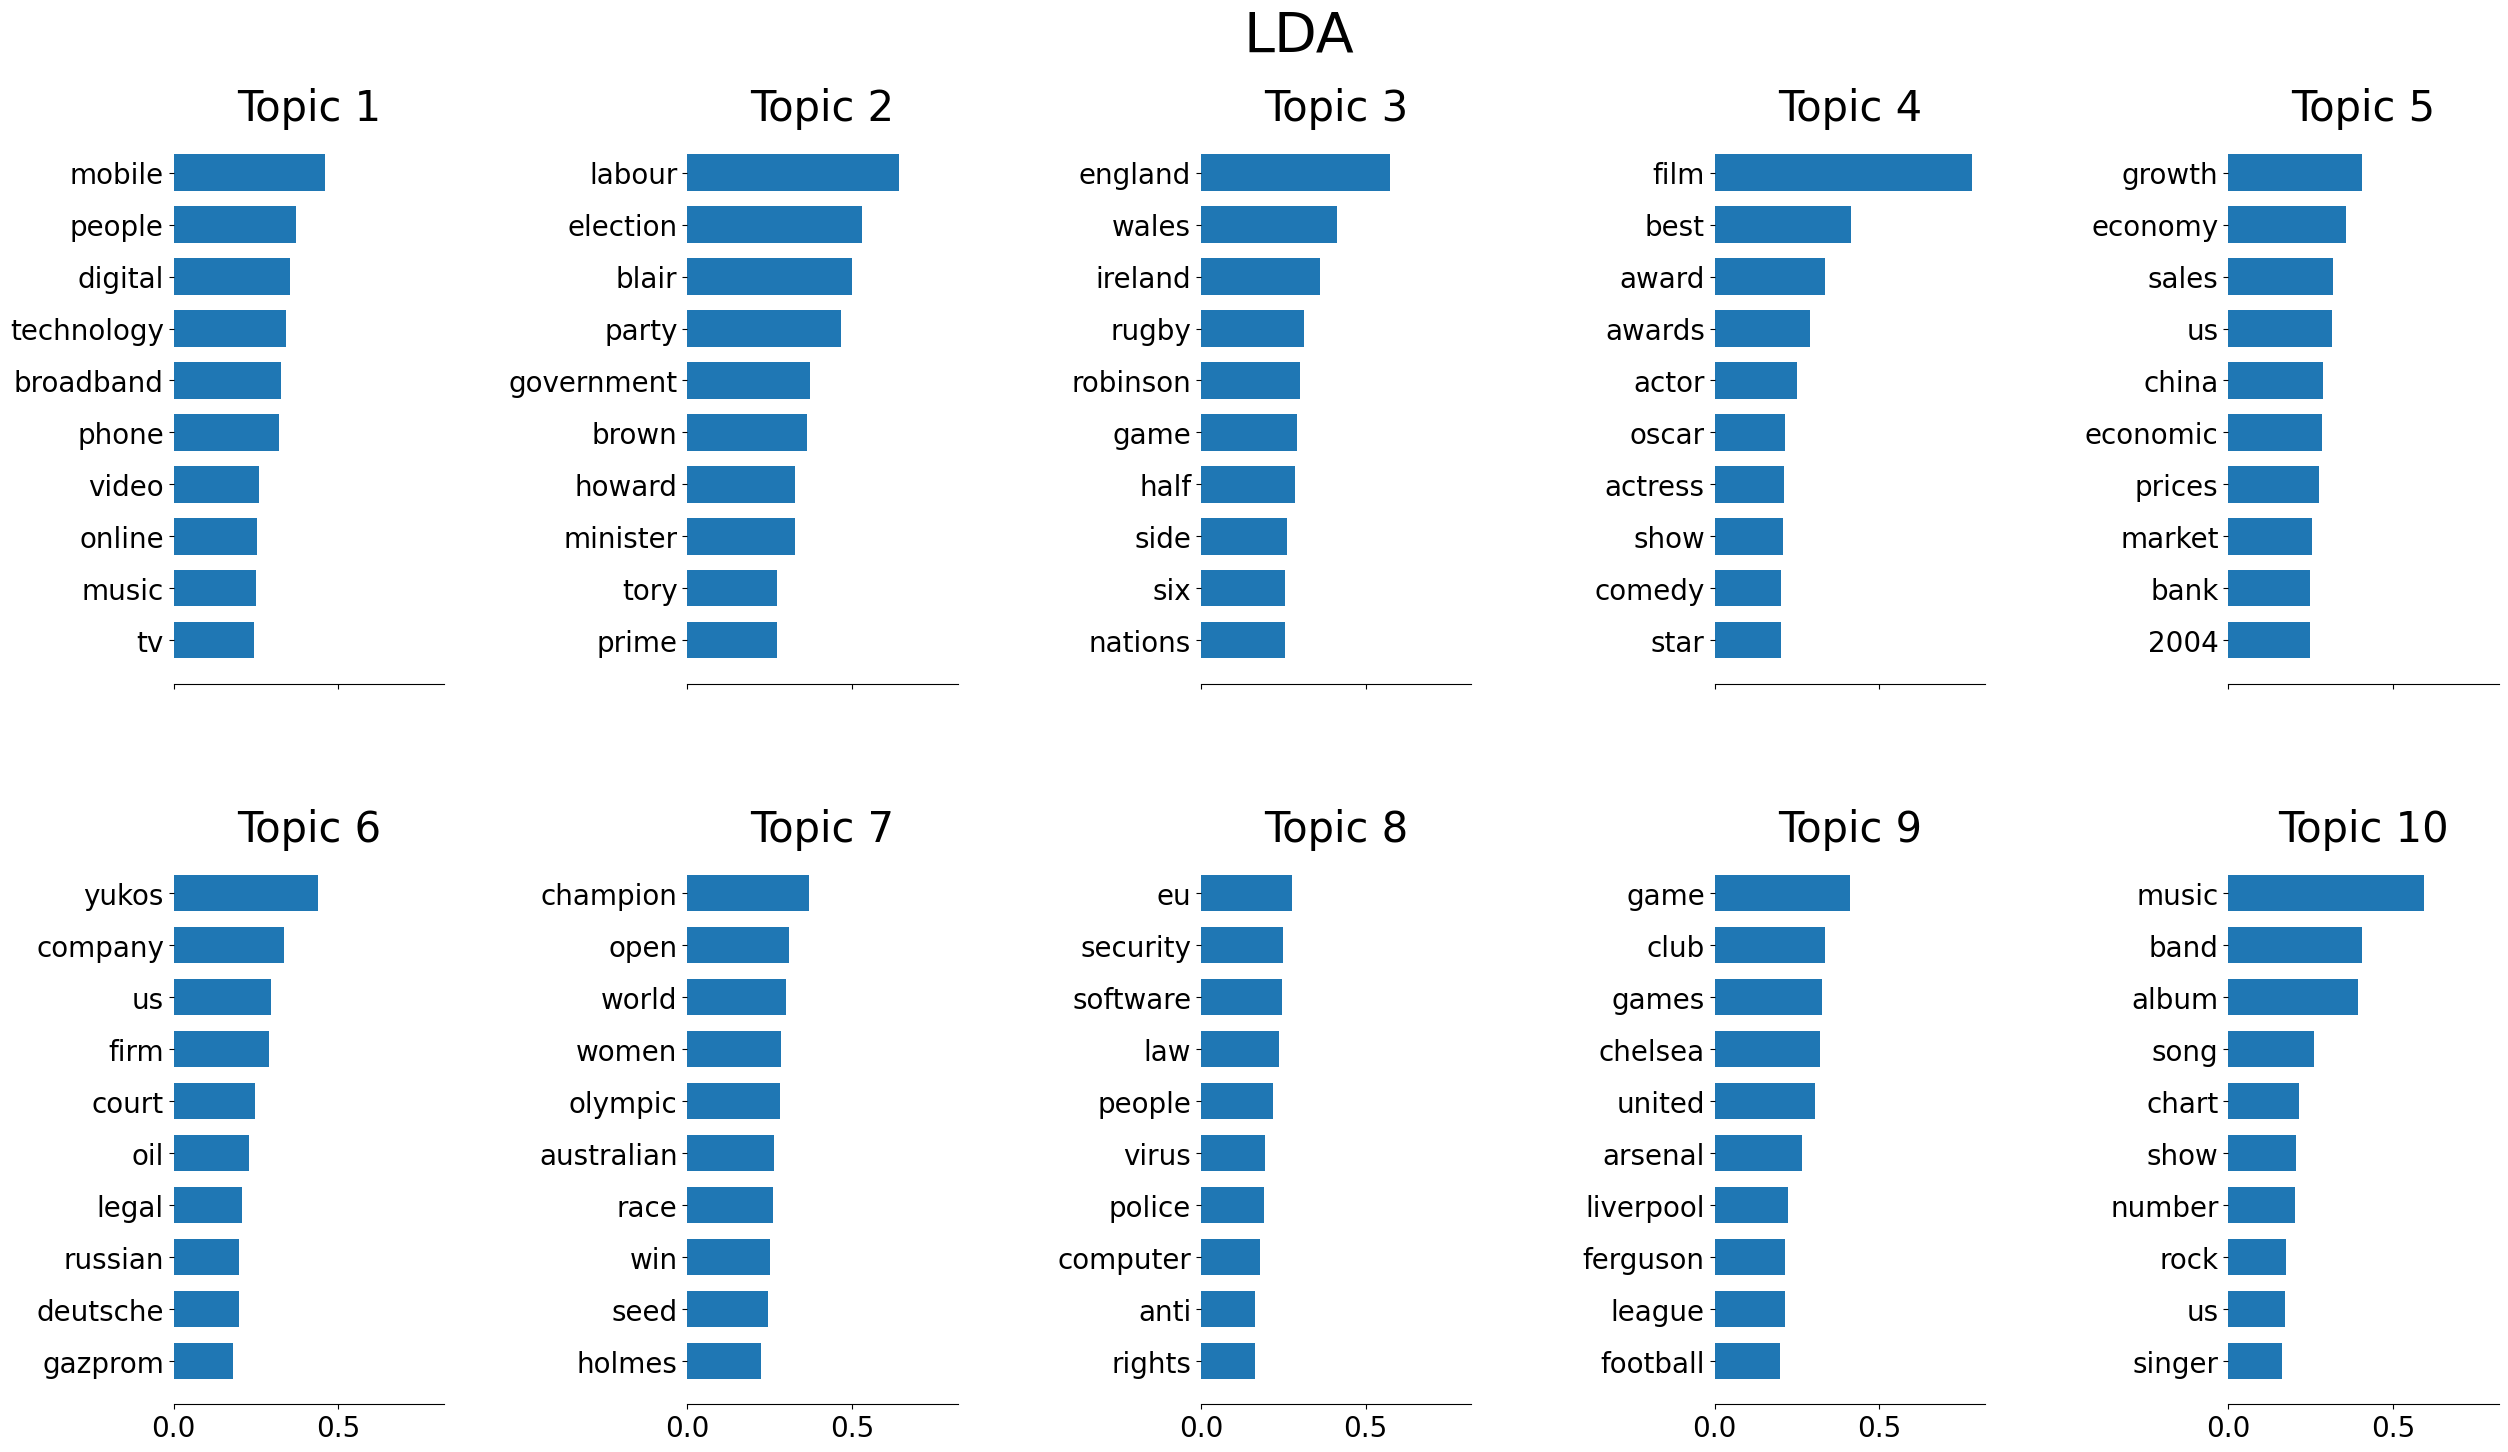

In [13]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(nmf,feature_names)
# many stopwords?


Text(0.5, 1.0, 'True label: business ')

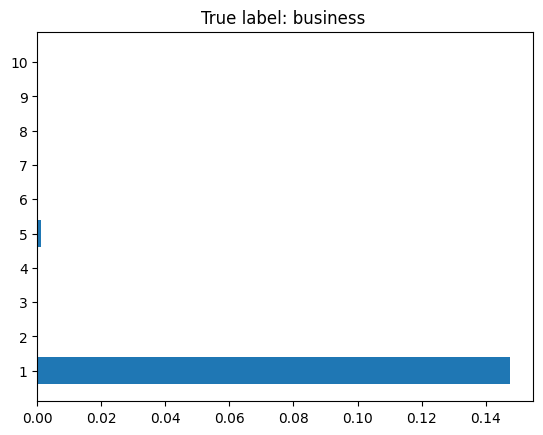

In [18]:
z = nmf.transform(X_train)
# pick a random document 
#$ check which topics are assosicated with it
# are they related to the truth label?
#np.random.seed(0)
i = np.random.choice(len(df))
z = z[i]
topics = np.arange(10)+1

fig,ax = plt.subplots()
ax.barh(topics,z)
ax.set_yticks(topics)
ax.set_title('True label: %s '% df.iloc[i]['labels'])

In [19]:
def wrap(x):
    return textwrap.fill(x,replace_whitespace=False,fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

Fed warns of more US rate rises

The US looks set for a continued
boost to interest rates in 2005, according to the Federal Reserve.
Minutes of the December meeting which pushed rates up to 2.25% showed
that policy-makers at the Fed are worried about accelerating
inflation.  The clear signal pushed the dollar up to $1.3270 to the
euro by 0400 GMT on Wednesday, but depressed US shares.  "The markets
are starting to fear a more aggressive Fed in 2005," said Richard
Yamarone of Argus Research.  The Dow Jones index dropped almost 100
points on Tuesday, with the Nasdaq also falling as key tech stocks
were hit by broker downgrades.  The dollar also gained ground against
sterling on Tuesday, reaching $1.8832 to the pound before slipping
slightly on Wednesday morning.

The release of the minutes just three
weeks after the 14 December meeting was much faster than usual,
indicating the Fed wants to keep markets more apprised of its
thinking.  This, too, is being taken in some quarters as a sign 